In [109]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
import scipy, scipy.stats

year = 2015


team_data = pd.read_csv('C:/Users/John/Desktop/Udacity_data_scientist_nanodegree/P2/Assignment/baseballdatabank-master/Teams.csv')


# Analyse a specific year first (most recent one)
team_year_data = team_data[team_data['yearID'] == year]
print(team_year_data.head()) # to quickly check the data

      yearID lgID teamID franchID divID  Rank    G  Ghome   W   L  \
2775    2015   AL    KCA      KCR     C     1  162   81.0  95  67   
2776    2015   AL    MIN      MIN     C     2  162   81.0  83  79   
2777    2015   AL    CLE      CLE     C     3  161   80.0  81  80   
2778    2015   AL    CHA      CHW     C     4  162   81.0  76  86   
2779    2015   AL    DET      DET     C     5  161   81.0  74  87   

         ...          DP     FP                name                 park  \
2775     ...       138.0  0.985  Kansas City Royals     Kauffman Stadium   
2776     ...       150.0  0.986     Minnesota Twins         Target Field   
2777     ...       136.0  0.987   Cleveland Indians    Progressive Field   
2778     ...       159.0  0.983   Chicago White Sox  U.S. Cellular Field   
2779     ...       165.0  0.986      Detroit Tigers        Comerica Park   

      attendance  BPF  PPF  teamIDBR  teamIDlahman45  teamIDretro  
2775   2708549.0  104  103       KCR             KCA        

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:4702: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:43: SettingWithCopyWarning: 
A value is trying to 

Populating the interactive namespace from numpy and matplotlib
Bad team feature statistics:

count     19.000000
mean     675.368421
std       39.243132
min      613.000000
25%      647.000000
50%      669.000000
75%      699.500000
max      748.000000
Name: R, dtype: float64
-----------------------------
Good team feature statistics:

count      9.000000
mean     705.666667
std       38.958311
min      647.000000
25%      683.000000
50%      697.000000
75%      729.000000
max      764.000000
Name: R, dtype: float64


Mann-Whitney U result
Statistic is 60.5
p-value is 0.0430670141517
Since p-value is less than 0.05, feature R is significantly different between the good and bad teams



Significantly different features between the good and bad teams are:
['R', '2B', 'HR', 'BB', 'HBP']


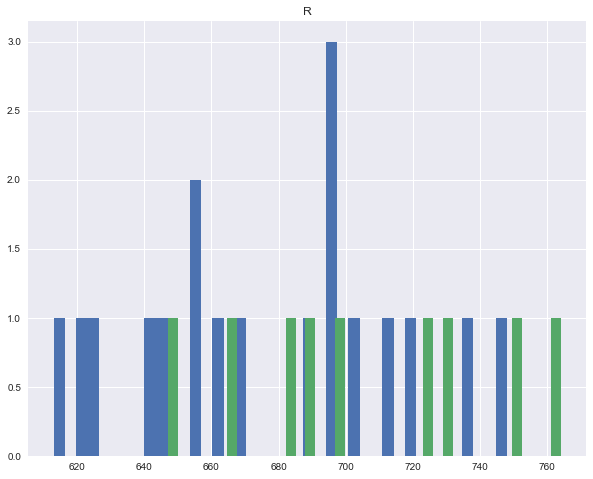

In [128]:
# Look at the winning statistics of all teams (both American League (AL) and National League (NL))

# There are 30 teams (15 in AL and 15 in NL) while only 10 get into post seaons. I categorise the teams into 
# better performing ones and average ones based on whether they get into post season or not.

# Better perfomring teams
G_team_year_data = team_year_data[(team_year_data['DivWin'] == 'Y')|(team_year_data['WCWin'] == 'Y')]
B_team_year_data = team_year_data[(team_year_data['DivWin'] == 'N')&(team_year_data['WCWin'] == 'N')]
#%pylab inline
#figH1, H1Axes = plt.subplots(nrows=2, ncols=2, sharex = False, figsize = (15,20))
#team_year_data.hist(column = 'W', ax=H1Axes[0,0])

#print(G_team_year_data.head(10))

# Batting features (R, AB, H, 2B, 3B, HR, BB, SO, SB, CS, HBP, SF)

bat_feature = ["R", "AB", "H", "2B", "3B", "HR", "BB", "SO", "SB", "CS", "HBP", "SF"]

feature = "R" # input one of the feature to have a quick exploratory investigation

remove_outlier = "Y" # If N, no data will be exlcuded. If Y, outliers will be excluded


def remove_ol(SR):
    filt_SR = SR
    low = .25
    high = .75
    quant_25_SR = filt_SR.quantile(low)
    quant_75_SR = filt_SR.quantile(high)
    
    IQR = quant_75_SR - quant_25_SR
    mean_val = filt_SR.mean()
    
    filt_SR[(filt_SR < mean_val - 1.5 * IQR) | (filt_SR > mean_val + 1.5 * IQR)] = numpy.nan
    
            #filt_SR = SR[(SR > mean_val - 1.5 * IQR) & (SR < mean_val + 1.5 * IQR)]
    return filt_SR

#test = remove_ol(B_team_year_data[feature])

if remove_outlier == "Y":
    temp_series = remove_ol(B_team_year_data[feature])
    B_team_year_data[feature] = temp_series
    temp_series = remove_ol(G_team_year_data[feature])
    G_team_year_data[feature] = temp_series


#bins = numpy.linspace(team_year_data[feature].min, team_year_data[feature].max, 10)

# Plotting the feature histogram, showing both good teams and bad teams feature histograms on the same graph
%pylab inline
figF1, F1Axes = plt.subplots(nrows=1, ncols=1, sharex = False, figsize = (10,8))
B_team_year_data.hist(column = feature, bins = 40, ax=F1Axes)
G_team_year_data.hist(column = feature, bins = 40, ax=F1Axes)

# Feature statstics of good and bad teams
print("Bad team feature statistics:\n")
print(B_team_year_data[feature].describe())
print("-----------------------------")
print("Good team feature statistics:\n")
print(G_team_year_data[feature].describe())

# Hypothesis testing (unequal sample t-test)
# H0: the means between good and bad teams are not different
# H1: the means between good and bad teams are different; reject null hypothesis
# Since the sample size is unequal and small, it is hard to assume normal distribution. Therefore, I used Mann-Whitney U test

print("\n")
print("Mann-Whitney U result")

[statistic, p_value] = scipy.stats.mannwhitneyu(B_team_year_data[feature], G_team_year_data[feature], use_continuity=True, alternative=None)

print("Statistic is", statistic)
print("p-value is", p_value)

if p_value < 0.05:
    print("Since p-value is less than 0.05, feature", feature, "is significantly different between the good and bad teams")
else:
    print("Since p-value is larger than 0.05, feature", feature, "is NOT significantly different between the good and bad teams")

    
# finding out the significant features    
sig_feature = []
for bf in bat_feature:
    [statistic, p_value] = scipy.stats.mannwhitneyu(B_team_year_data[bf], G_team_year_data[bf], use_continuity=True, alternative=None)
    if p_value < 0.05:
        sig_feature.append(bf)

print("\n\n")
print("Significantly different features between the good and bad teams are:")
print(sig_feature)